<a href="https://colab.research.google.com/github/YEOWEIHNGWHYELAB/CS3244-Work/blob/main/CS3244_Data_Handling_Clinic_Session_1_(Student_Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available at http://www.comp.nus.edu.sg/~cs3244/AY22S1/dhc.01.html

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/AY22S1/2210-header.png)
---

# Data Handling Clinic: Session 1

Here, we're covering basic and intermediate level features of `pandas` and `numpy`. 


> This is a purely TA-led initiative and we appreciate the Profs' guidance and support. 

# 1. Introduction to `pandas`

1. Loading CSV files into `pd.DataFrame`
2. Selection and Slicing
3. Iterating through a `DataFrame`
4. Mapping functions on Rows
5. Complex Querying with `DataFrame.where`
6. Getting unique values
7. Data statistics using `DataFrame.describe`
8. Converting textual categories to integers
9. Identifying columns missing values
10. Data Imputation
  - Replacing with `mean`, `max`, `min` (continuous)
  - Replacing with frequent values / constant (categorical)

In [ ]:
# imports
import pandas as pd
import numpy as np

## 1.1 Downloading the Dataset

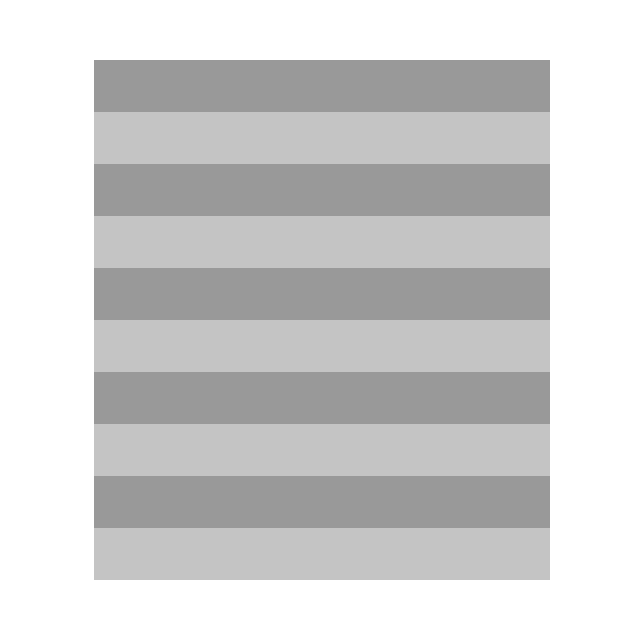

In [ ]:
IRIS_URL = "https://raw.githubusercontent.com/rish-16/CS3244-Tutorial-Material/main/T2W4/data/iris.csv"
!wget {IRIS_URL}

--2022-09-23 06:10:49--  https://raw.githubusercontent.com/rish-16/CS3244-Tutorial-Material/main/T2W4/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4609 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-09-23 06:10:49 (19.9 MB/s) - ‘iris.csv’ saved [4609/4609]



In [ ]:
# load dataset into a pandas DataFrame
IRIS_PATH = 'iris.csv'
df = pd.DataFrame(pd.read_csv(IRIS_PATH))
print(df.columns)

df


Index(['sepal_length', ' sepal_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 1.2 Slicing the dataset

Just like normal lists, you can slice DataFrames into different parts, both row-wise and column-wise

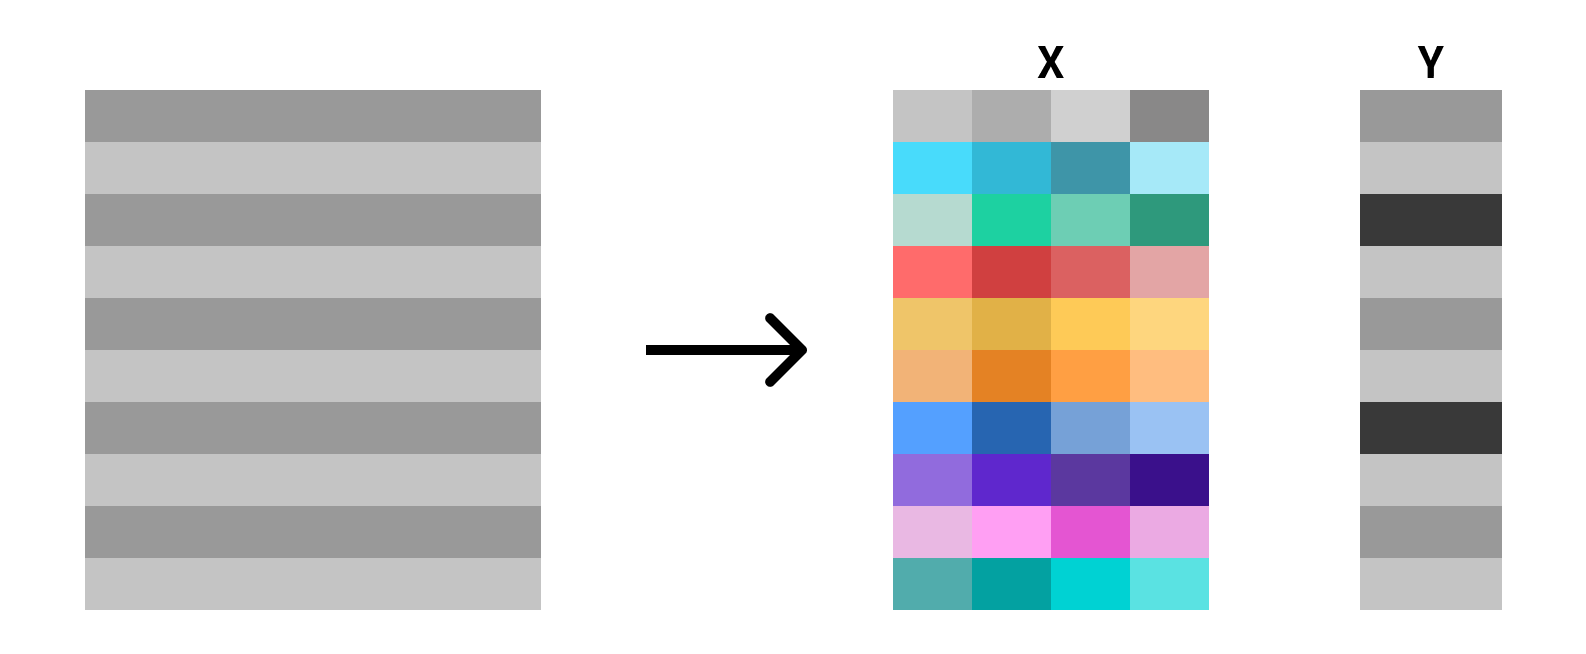

In [ ]:
# Slice all rows of first four columns
# Slice the labels / fifth column in the frame
X = df.iloc[:,:4]
Y = df.iloc[:, 4]
# display First 10 rows
X[:10]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# display first 10 labels
Y[:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name:  class, dtype: object

## 1.3 Performing functions column-wise and row-wise

Column-wise functions can be invoked with `map`.

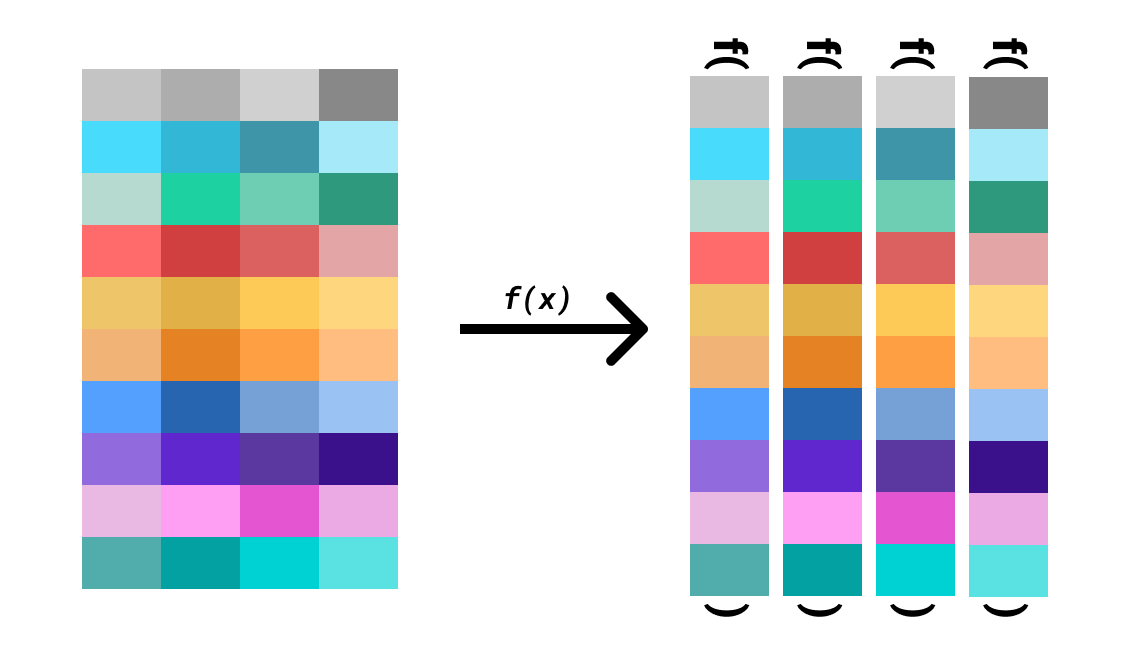

In [ ]:
# let's normalise each column separately
for axis in range(4):
  col_max = X.iloc[:, axis].max()
  X.iloc[:, axis] = X.iloc[:, axis]. map(lambda x : float(x / col_max))


# display 10 rows
X[:10]

,sepal_length,sepal_width,petal_length,petal_width
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08
5,0.683544,0.886364,0.246377,0.16
6,0.582278,0.772727,0.202899,0.12
7,0.632911,0.772727,0.217391,0.08
8,0.556962,0.659091,0.202899,0.08
9,0.620253,0.704545,0.217391,0.04


In [ ]:
X[' petal_length']

0      0.202899
1      0.202899
2      0.188406
3      0.217391
4      0.202899
         ...   
145    0.753623
146    0.724638
147    0.753623
148    0.782609
149    0.739130
Name:  petal_length, Length: 150, dtype: float64

Row-wise functions can be invoked using `apply`

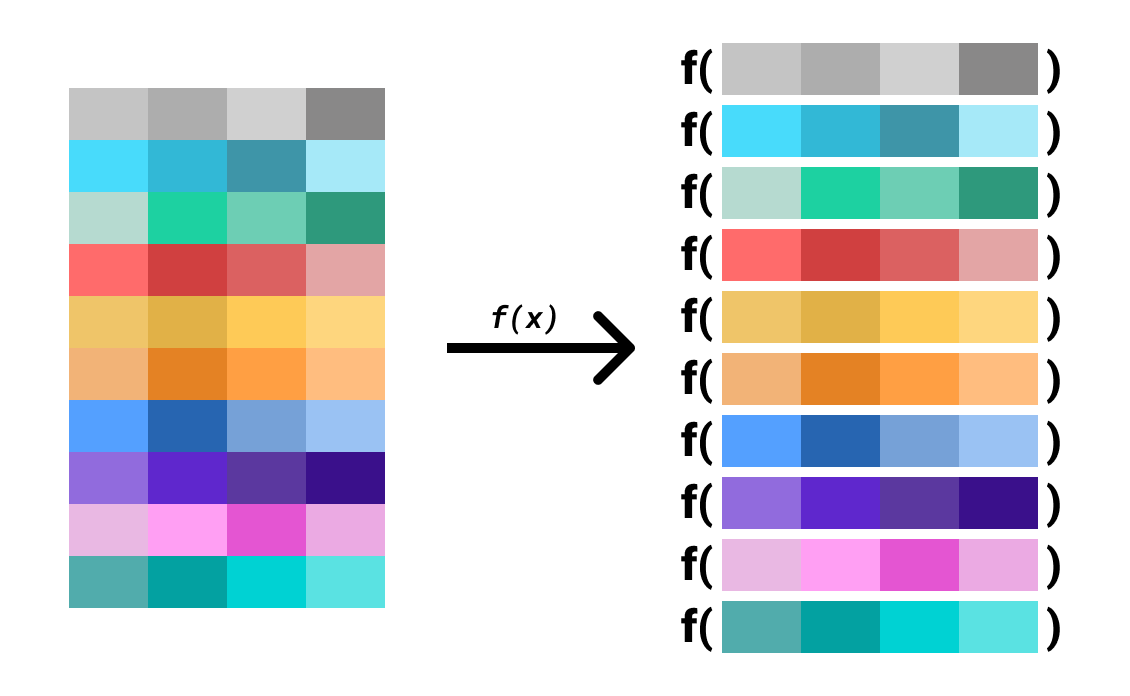

In [ ]:
# let's translate our data
X_translated = X.copy()

X_translated = X_translated.apply(lambda x : x + 2)

X_translated[:10]

,sepal_length,sepal_width,petal_length,petal_width
0,2.645570,2.795455,2.202899,2.08
1,2.620253,2.681818,2.202899,2.08
2,2.594937,2.727273,2.188406,2.08
3,2.582278,2.704545,2.217391,2.08
4,2.632911,2.818182,2.202899,2.08
5,2.683544,2.886364,2.246377,2.16
6,2.582278,2.772727,2.202899,2.12
7,2.632911,2.772727,2.217391,2.08
8,2.556962,2.659091,2.202899,2.08
9,2.620253,2.704545,2.217391,2.04


In [ ]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

## 1.4 Querying and Filtering Data

You can use the `where` method to query a DataFrame with a specified condition.

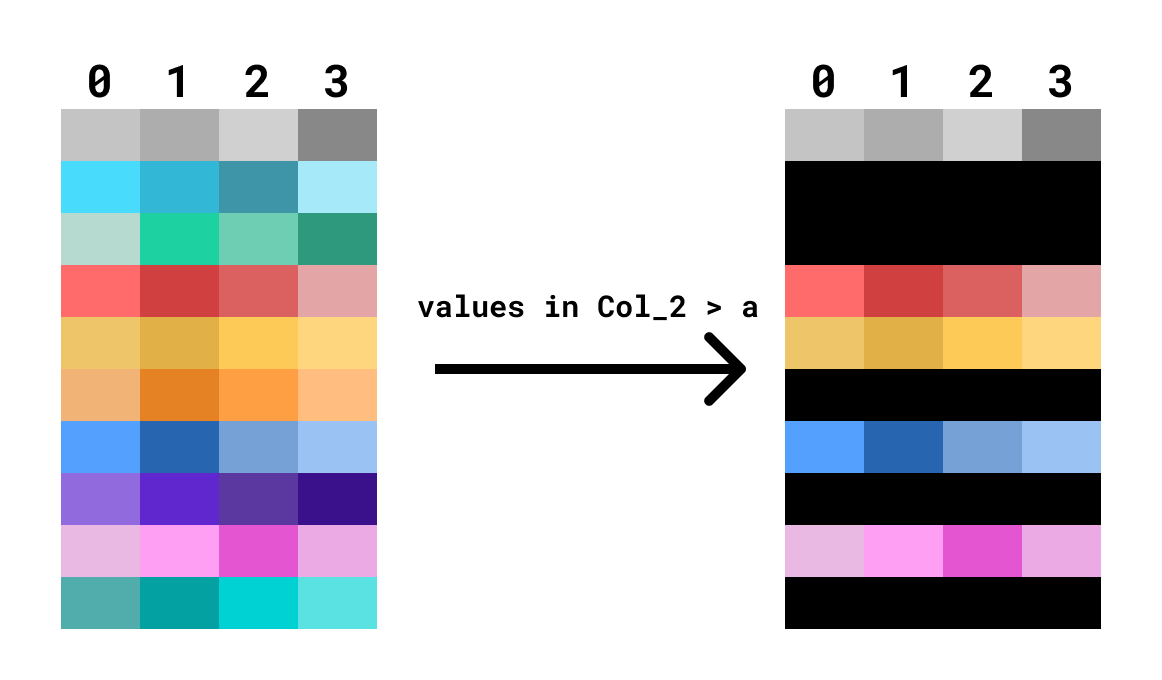

In [ ]:
# filter data where sepal_length >= 0.75 using numpy where
filtered = X.where(X['sepal_length'] >= 0.75)
filtered

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92
146,0.797468,0.568182,0.724638,0.76
147,0.822785,0.681818,0.753623,0.80
148,0.784810,0.772727,0.782609,0.92


In places where the condition is met, you'd want to replace it with a custom value like `NaN` or a placeholder like `?`. You can specify this placeholder constant in `where(...)`

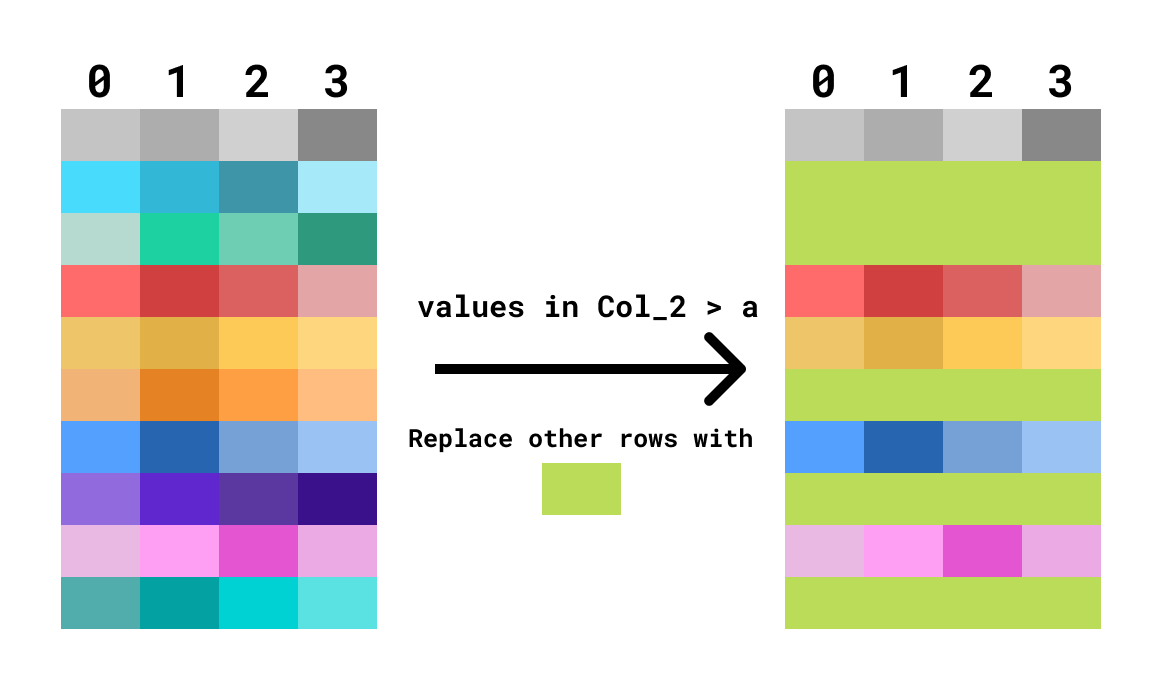

In [ ]:
# filter data where sepal_length <= 0.79 using numpy where
# for NaN use a placeholder '?'
filtered = X.where(X['sepal_length'] >= 0.75, '?')
filtered


,sepal_length,sepal_width,petal_length,petal_width
0,?,?,?,?
1,?,?,?,?
2,?,?,?,?
3,?,?,?,?
4,?,?,?,?
...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92
146,0.797468,0.568182,0.724638,0.76
147,0.822785,0.681818,0.753623,0.8
148,0.78481,0.772727,0.782609,0.92


You can also get other columns as long as the respective rows meet the given condition(s).

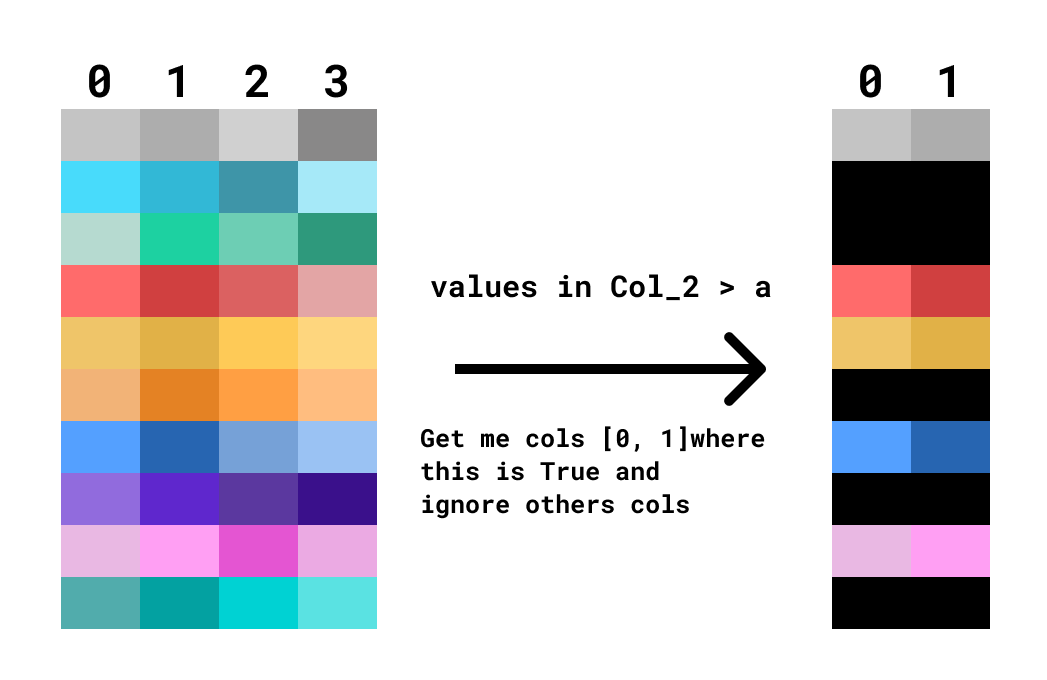

In [ ]:
# Slice sepal_length and petal length of all the data which meets condition sepal_width > 0.65
filtered = X[['sepal_length', ' petal_length']].where(X[' sepal_width'] >= 0.65)
filtered


,sepal_length,petal_length
0,0.645570,0.202899
1,0.620253,0.202899
2,0.594937,0.188406
3,0.582278,0.217391
4,0.632911,0.202899
...,...,...
145,0.848101,0.753623
146,NaN,NaN
147,0.822785,0.753623
148,0.784810,0.782609


## 1.5 Working with categorical data

When working with categorical data, it's nice to see how many unique "classes" or categories there are in the dataset. 

You can do this with `unique`

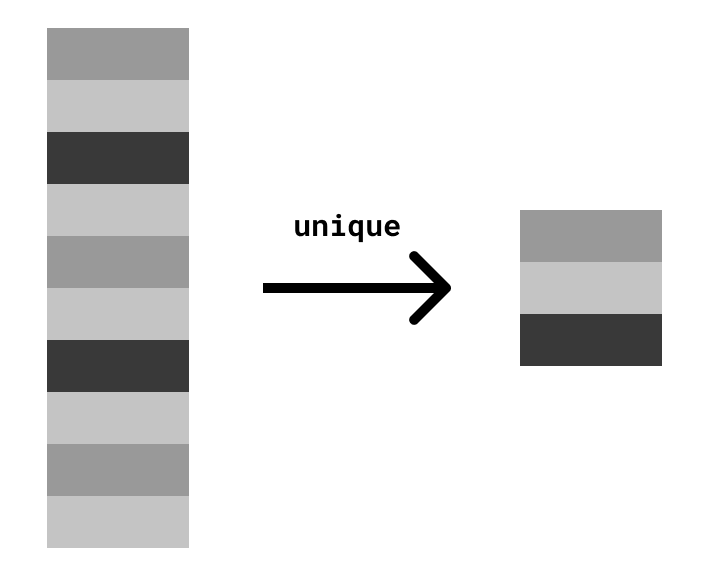

In [ ]:
# Print all class names
classes = list(Y.unique())
classes


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
# create a mapper for all the class names to integers [0, 1, .. , n-1]
class_mapper = {}

for i in range(len(classes)):
  class_mapper[classes[i]] = i

class_mapper

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

You can also use the `map` function to apply a column-wise function (i.e., the class mapper that maps a class to an integer)

In [ ]:
# use mapper to get integer class labels
Y_int_class = Y.map(class_mapper)

Y_int_class

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name:  class, Length: 150, dtype: int64

## 1.6 Describing DataFrames

Sometimes, getting a snapshot of the dataset (ie. like player stats) is a good indication of next steps. The description given by `describe` is a great starting point in analysing your data and the values it contains.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
DBTS_URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
!wget {DBTS_URL}

--2022-09-23 06:10:50--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.004s  

2022-09-23 06:10:50 (6.18 MB/s) - ‘pima-indians-diabetes.csv’ saved [23278/23278]



In [ ]:
DBTS_PATH = "pima-indians-diabetes.csv"
dbts_df = pd.read_csv(DBTS_PATH, header=None)
dbts_df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Column Definitions:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

In [ ]:
# quick glance of dataset
dbts_df.describe() 

# observe how the minimum of some columns is "0.000". This doesn't make sense and indicates the possible presence of missing values

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# break into X and Y
X = dbts_df.iloc[:, :8]

Y = dbts_df.iloc[:, 8]




## 1.7 Finding number of Missing Values

Missing Values are values that are missing (well, duh). They contribute nothing to the dataset and are a result of data preparation/collection errors. 

> **WARNING:** They degrade model performance if not handled properly!!!

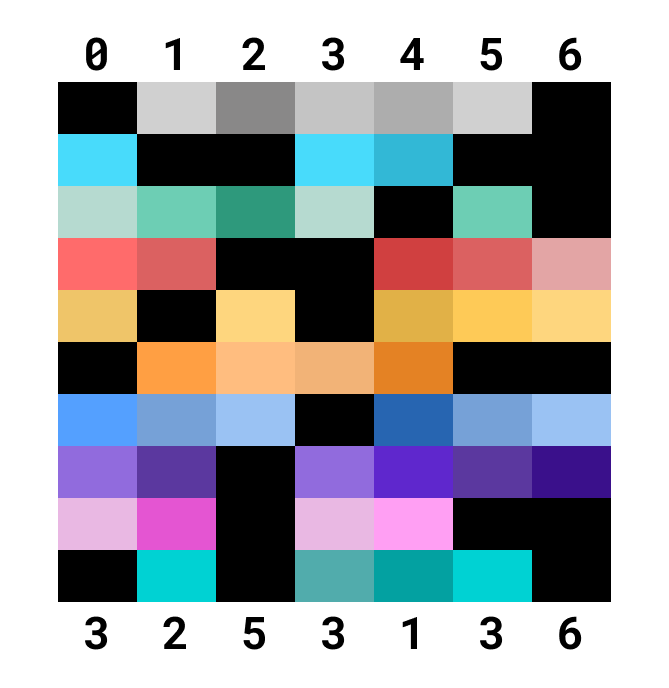

Sometimes, values like `0` or `NaN` occur in places that don't make sense. Sure, `0` pregnancies makes sense, but what about `0` Blood Pressure or `0` BMI?

In such situations, we aim to cautiously remove them or replace them.

In [ ]:
# get number of missing values in each column
for i in range(1, 6):
  num_missing = X.iloc[:, i].where(X[i] == 0).count()
  print(i, num_missing)

1 5
2 35
3 227
4 374
5 11


In [ ]:
# 10 rows of data
X[:10]

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


## 1.8 Replacing Inappropriate Values with Placeholders

Sometimes, it's best to take missing values and convert them into other formats so they work well with other libraries.

In [ ]:
X_nan = X.copy()

X_nan[[2,3,4, 5]] = X_nan[[2,3,4,5]].replace({0:np.NaN})

X_nan[:10]

,0,1,2,3,4,5,6,7
0,6,148,72.0,35.0,NaN,33.6,0.627,50
1,1,85,66.0,29.0,NaN,26.6,0.351,31
2,8,183,64.0,NaN,NaN,23.3,0.672,32
3,1,89,66.0,23.0,94.0,28.1,0.167,21
4,0,137,40.0,35.0,168.0,43.1,2.288,33
5,5,116,74.0,NaN,NaN,25.6,0.201,30
6,3,78,50.0,32.0,88.0,31.0,0.248,26
7,10,115,NaN,NaN,NaN,35.3,0.134,29
8,2,197,70.0,45.0,543.0,30.5,0.158,53
9,8,125,96.0,NaN,NaN,NaN,0.232,54


### 1.8.1 Dropping Rows

Sometimes, in the real world, when your dataset is large, there are bound to be some missing values. As such, one option you have is to drop those rows if you are lazy to preprocess them any further.

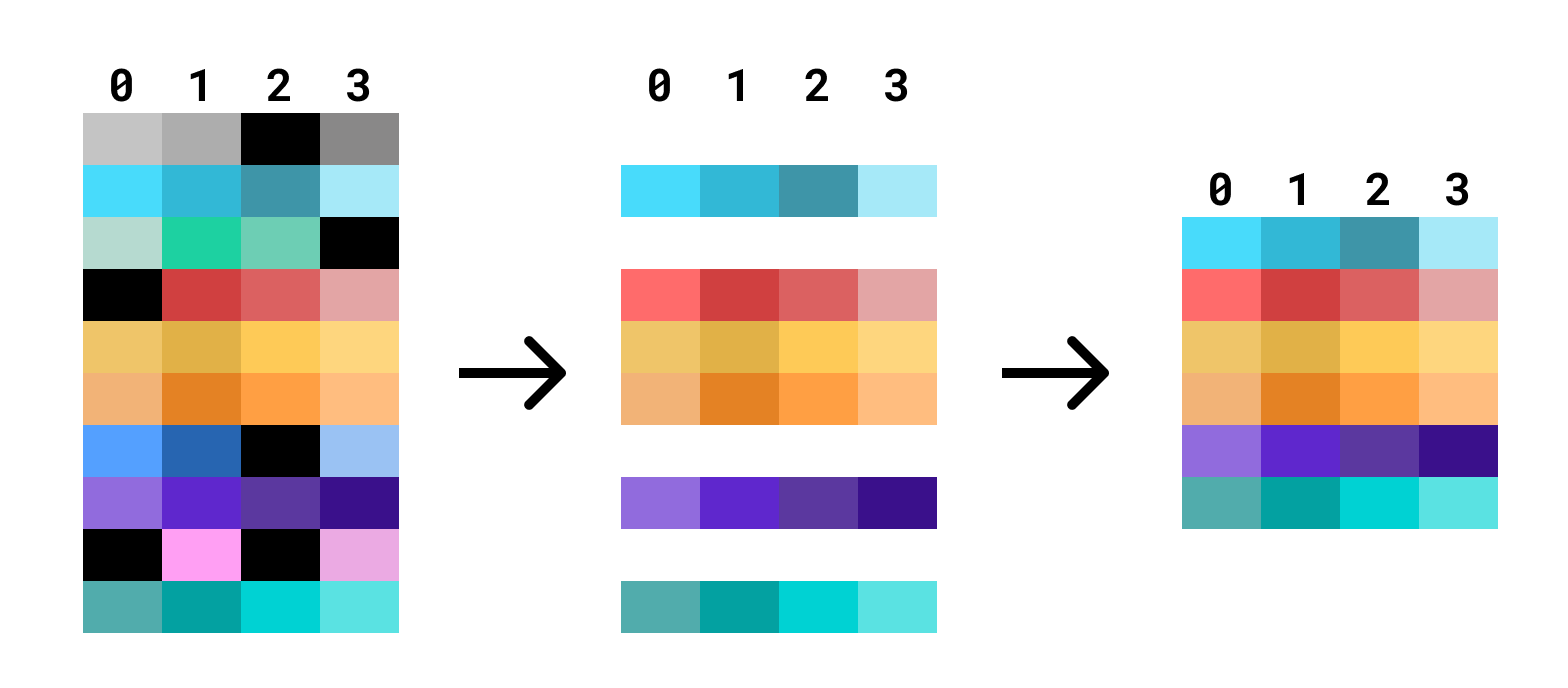

In [ ]:
# dropping rows with NaN inside them
X_dropped = X_nan.dropna(how='any', axis=0)

X_dropped[:10]

,0,1,2,3,4,5,6,7
3,1,89,66.0,23.0,94.0,28.1,0.167,21
4,0,137,40.0,35.0,168.0,43.1,2.288,33
6,3,78,50.0,32.0,88.0,31.0,0.248,26
8,2,197,70.0,45.0,543.0,30.5,0.158,53
13,1,189,60.0,23.0,846.0,30.1,0.398,59
14,5,166,72.0,19.0,175.0,25.8,0.587,51
16,0,118,84.0,47.0,230.0,45.8,0.551,31
18,1,103,30.0,38.0,83.0,43.3,0.183,33
19,1,115,70.0,30.0,96.0,34.6,0.529,32
20,3,126,88.0,41.0,235.0,39.3,0.704,27


In [ ]:
# using imputers
from sklearn.impute import SimpleImputer as SI
from pprint import pprint

### 1.8.2 Imputing with Frequency

For a given column, and for a given missing value, we can replace the MV with the most frequent occurrence in THAT column.

In [ ]:
X_new = X_nan.copy()
imp_mf = SI(missing_values=np.NaN, strategy='most_frequent')
X_most_freq = imp_mf.fit_transform(X_new)
pd.DataFrame(X_most_freq[:10])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,32.0,105.0,25.6,0.201,30.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
7,10.0,115.0,70.0,32.0,105.0,35.3,0.134,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
9,8.0,125.0,96.0,32.0,105.0,32.0,0.232,54.0


### 1.8.3 Imputing with Mean

For a given column, and for a given missing value, we can replace the MV with the mean/average of THAT column.

In [ ]:
X_new = X_nan.copy()
imp_mean = SI(missing_values=np.NaN, strategy='mean')
X_most_freq = imp_mean.fit_transform(X_new)
pd.DataFrame(X_most_freq[:10])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0
4,0.0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0
5,5.0,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0
6,3.0,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0
7,10.0,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0
8,2.0,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0
9,8.0,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0


# 2. Introduction to NumPy

1. Conversion to `np.array`
2. Operations
  - Matrix and Vector addition and multiplication
  - Selection and Slicing
  - Matrix Transpose
  - Data Copying
  - Fast Querying
3. Randomness
  - Random integers
  - Random matrices
4. Splitting datasets

## 2.1 Motivating NumPy

Linear Algebra forms the backbone of Machine Learning, more specifically Deep Learning. Without it, we have no nice way of representing parameters or even data for that matter.

BUT, Linear Algebra is hard using Python. We have to use all sorts of list comprehension helper methods to compute different things.

> No one has that kind of time. We want results – and quick.

`numpy` is the numerical computing library that helps us with Linear Algebra.

#### Life without NumPy

In [ ]:
A = [1, 2, 3, 4]
B = [5, 6, 7, 8]
C = [None for _ in range(len(A))]

for i in range(len(A)):
  C[i] = A[i] + B[i]

print (C)  

[6, 8, 10, 12]


In [ ]:
A = [
  [1, 2, 3],
  [3, 4, 5],
  [6, 7, 8],
]

B = [
  [6, 7, 8, 10],
  [3, 4, 5, 12],
  [1, 2, 3, 23],
]

# it's difficult to do A * B

#### Enter NumPy

In [ ]:
A = np.array([1, 2, 3, 4])
B = np.array([5, 6, 7, 8])


# addition using numpy

C1 = A + B

print(C1)
print(C)


[ 6  8 10 12]
[6, 8, 10, 12]


In [ ]:
A = np.array([
  [1, 2, 3],
  [3, 4, 5],
  [6, 7, 8]
])

B = np.array([
  [6, 7, 8, 10],
  [3, 4, 5, 12],
  [1, 2, 3, 23]
])


# multiplication using numpy

D = A@B
E = np.dot(A,B)
F = np.matmul(A,B)

print(D)
print(E)
F



[[ 15  21  27 103]
 [ 35  47  59 193]
 [ 65  86 107 328]]
[[ 15  21  27 103]
 [ 35  47  59 193]
 [ 65  86 107 328]]


array([[ 15,  21,  27, 103],
       [ 35,  47,  59, 193],
       [ 65,  86, 107, 328]])

Let's look at the _Iris Dataset_ once again. But instead of using Pandas, let's use NumPy to do the exact same things we did!

In [ ]:
IRIS_URL = "https://raw.githubusercontent.com/rish-16/CS3244-Tutorial-Material/main/T2W4/data/iris.csv"
!wget {IRIS_URL} -O iris2.csv && ls

--2022-09-23 06:10:52--  https://raw.githubusercontent.com/rish-16/CS3244-Tutorial-Material/main/T2W4/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4609 (4.5K) [text/plain]
Saving to: ‘iris2.csv’

iris2.csv           100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-09-23 06:10:52 (57.1 MB/s) - ‘iris2.csv’ saved [4609/4609]

iris2.csv  iris.csv  pima-indians-diabetes.csv	sample_data


In [ ]:
df = pd.read_csv('iris2.csv')
values = df.values

values[:10]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

In [ ]:
print (values.shape)  # .shape helps us get the dimensions of a NumPy array

(150, 5)


In [ ]:
X = values[:, :4]
Y = values[:, 4]

print (X[:10], Y[:10])
print (X.shape, Y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
(150, 4) (150,)


In [ ]:
X_copy = X.copy()
print (X_copy.shape)

(150, 4)


## 2.1 Randomness

A lot of Machine Learning algorithms, and the ones you'll learn soon, require a bit of randomness, be it in the parameters or hyper-parameters. Either way, you'll need to generate random integers, floats, vectors, and matrices on the fly.

The `np.random` package helps us with exactly that.

In [ ]:
from pandas.core.roperator import rand_
# create a random number using numpy random and display
rand_int = np.random.randint(0,100)
rand_int

92

In [ ]:
# Create a matrix random integers of 5x5 where the random integers in the range [0, 1,2, ..., 99]
rand_ints = np.random.randint(0,100, size=[5,5])
rand_ints

array([[71, 18, 50, 34, 82],
       [77,  0, 74, 45, 33],
       [84,  6, 39, 93, 63],
       [96, 81,  2, 68,  6],
       [87, 33, 26, 62, 61]])

In [ ]:
# creating random and uniform distribution
X = np.random.rand(100, 5)
Y = np.random.uniform(0,1, size=100) # uniform distribution {0, 1}

X.shape, Y.shape


((100, 5), (100,))

## 2.2 Creating Train/Test Splits

Given a dataset `(X, Y)`, you can break it up into training and testing sets using Data Splicing from above. 

In [ ]:
X = np.random.rand(1000, 5)
Y = np.random.choice([0, 1], size=(1000))

print (X[:10], Y[:10])

[[0.19931899 0.74234342 0.55673508 0.01451416 0.45458084]
 [0.44071135 0.75421029 0.39063961 0.41984973 0.41680952]
 [0.24539968 0.65928085 0.85268054 0.87447761 0.50752083]
 [0.06441795 0.02684821 0.46991949 0.5604101  0.7425345 ]
 [0.4605995  0.49055747 0.197238   0.73495344 0.25562718]
 [0.67709885 0.24388408 0.12435072 0.3805168  0.12005226]
 [0.92514357 0.51285586 0.18129044 0.70147974 0.90695476]
 [0.11356021 0.01238808 0.84371312 0.81157738 0.63392959]
 [0.48782331 0.14008588 0.54085286 0.83737428 0.66239049]
 [0.83336181 0.73707384 0.52469536 0.93229843 0.23867664]] [0 1 1 0 0 1 1 0 0 1]


In [ ]:
train_split = 0.8

# manually split into train and test, display the sizes
N, d = X.shape

num_train = int(N * train_split)

X_train, X_test = X[:num_train], X[num_train:]
Y_train, Y_test = Y[:num_train], Y[num_train:]

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 5), (200, 5), (800,), (200,))

Of course, there are better ways of doing this usking `sklearn`:

In [ ]:
from sklearn.model_selection import train_test_split as tr_te_s

In [ ]:
#  DO the same split using sklearn

X_train, X_test, Y_train, Y_test = tr_te_s(X, Y, test_size=0.2)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape




((800, 5), (200, 5), (800,), (200,))

# Credits
TA Pranavan, and TA Rishabh (CS3244 ML 2021, 2022) under the guidance of Prof Min-Yen Kan and Prof Brian Lim